# Environment & Market study for restaurant "La ö"

## Import and env creation

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# Get data for all neighborhoods: 
(size, lat, long, socio-economic data file location)

In [4]:
# @hidden_cell
# read the quartiers and subquartiers and their shape
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ee18f7d983c9491fa227cbcc5b48b7f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='uNvb5RiIuvdx9k-mcugVadO3W6duMXZO3awVj4TvXgwn',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ee18f7d983c9491fa227cbcc5b48b7f1.get_object(Bucket='courseracapstonedatascience-donotdelete-pr-phsjrfy99t4wme',Key='VilleMTP_MTP_SousQuartiers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body,encoding='latin1',sep=';')
#df_data_0.head()

# cleanup the headers to remove suffix into column names
df_data_0.columns = df_data_0.columns.str.replace(r',.*$', '')
montpellier_sousquartier = df_data_0
montpellier_sousquartier.pop("OBJECTID")
col = montpellier_sousquartier.pop("QUARTIER")
col1 = montpellier_sousquartier.pop("SQUARTIER_")
col2 = montpellier_sousquartier.pop("SQUARTMNO")
montpellier_sousquartier.insert(0, col.name, col)
montpellier_sousquartier.insert(0, col1.name, col1)
montpellier_sousquartier.insert(0, col2.name, col2)
montpellier_sousquartier.sort_values(by=['SQUARTIER_'])

# read the latitude and longitude of each sub-quarter
body = client_ee18f7d983c9491fa227cbcc5b48b7f1.get_object(Bucket='courseracapstonedatascience-donotdelete-pr-phsjrfy99t4wme',Key='Montpellier_latlong_sous_quartiers.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

montpellier_sousquartier_ll = pd.read_excel(body)
#montpellier_sousquartier_ll.head()

# merge the latitude and longitude
montpellier_sousquartier = pd.merge(montpellier_sousquartier, montpellier_sousquartier_ll[['SQUARTIER_','LONGITUDE','LATITUDE','SocioEcoFile']], on='SQUARTIER_')
montpellier_sousquartier.set_index("SQUARTIER_", inplace=True)
montpellier_sousquartier.head()

,SQUARTMNO,QUARTIER,AREA,PERIMETER,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile
SQUARTIER_,,,,,,,,,,
7,HOS,1,2301380,"7061,21",Plan des 4 Seigneurs,"7063,80336949","2303072,59613",3.856287,43.642495,Sous-quartier_03_Plan des 4 seigneurs.xlsx
8,HOP,1,6206980,"13931,1",Hopitaux-Facultés,"13936,2911114","6211651,21697",3.836393,43.637377,Sous-quartier_01_Hôpitaux-Facultés.xlsx
9,HOA,1,3972670,"9684,44",Aiguelongue,"9688,06417322","3975651,2364",3.881898,43.636289,Sous-quartier_02_Aiguelongue.xlsx
10,PAH,2,1931160,"8305,84",Les Hauts de Massane,"8308,95386621","1932615,57883",3.816962,43.636451,Sous-quartier_05_Hauts de Massane.xlsx
11,CVA,3,2060110,"7405,88",Alco,"7408,75233283","2061702,41074",3.839013,43.619652,Sous-quartier_07_Alco.xlsx


## Get socio/economical data of each neighborhood

In [5]:
# location of the informations in the xls from opendata montpellier
ROW=0
COL=1
ROUND=2
socialDataCells = {
    'Population2009' : [3,1,True],
    'TerritorySurface' : [5,1,True],
    'IncomePerInhanbitant':[7,1,True],
    'PercentageLandowners':[9,1,False],
    'PercentageTenants':[9,10,False],
    'NumberInhabitantskilometer2':[5,10,True],
    'NumberSocialMinimumIncome':[7,10,True],    
    'PercentageUnemployed':[7,20,False],
    'PercentageRentControlledHousing':[9,20,True],
    # other data to be taken
    
    '0-14years':[42,5,True],
    '15-29years':[43,5,True],
    '30-44years':[44,5,True],
    '45-59years':[45,5,True],
    '60-74years':[46,5,True],
    '75+years':[47,5,True],
    
    'Percentage0-14years':[42,6,False],
    'Percentage15-29years':[43,6,False],
    'Percentage30-44years':[44,6,False],
    'Percentage45-59years':[45,6,False],
    'Percentage60-74years':[46,6,False],
    'Percentage75+years':[47,6,False],

    'Agriculteurs exploitants':[51,5,True],
    'Artisans, Comma., Chefs entr.':[52,5,True],
    'Cadres, Prof. intel. sup.':[53,5,True],
    'Prof. Intermédiaires':[54,5,True],
    'Employés':[55,5,True],
    'Ouvriers':[56,5,True],
    'Retraités':[57,5,True],
    'Autres':[58,5,True],
    
    'PercentageAgriculteurs exploitants':[51,6,False],
    'PercentageArtisans, Comma., Chefs entr.':[52,6,False],
    'PercentageCadres, Prof. intel. sup.':[53,6,False],
    'PercentageProf. Intermédiaires':[54,6,False],
    'PercentageEmployés':[55,6,False],
    'PercentageOuvriers':[56,6,False],
    'PercentageRetraités':[57,6,False],
    'PercentageAutres':[58,6,False],
    
    'Français':[62,1,True],
    'Étrangers':[63,1,True],
    'PercentageFrançais':[62,2,False],
    'PercentageÉtrangers':[63,2,False],

    'Ménages 1 personne':[71,1,True],
    'Autres sans famille':[74,1,True],
    'Ménages avec famille(s)':[75,1,True],
    
    'PercentageMénages 1 personne':[71,2,False],
    'PercentageAutres sans famille':[74,2,False],
    'PercentageMénages avec famille(s)':[75,2,False],
    
    'Famille0 enfant':[87,1,True],  
    'Famille1 enfant':[88,1,True],  
    'Famille2 enfants':[89,1,True],  
    'Famille3 enfants':[90,1,True],  
    'Famille4 enfants ou plus':[91,1,True],  

    'TenantWithAllocation':[223,5,True],

    'Flats':[233,1,True],
    'Houses':[234,1,True],
    
    'WorkingInMontpellier':[264,3,True],
    'WorkingOutsiteMontpellier':[265,3,True],

    #
    # economic activity
    #
     'Industries extractives,  énergie, eau, gestion des déchets et dépollution':[296,5,True],
     'Fabrication de denrées alimentaires, de boissons et  de produits à base de tabac':[297,5,True],
     'Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines':[298,5,True],
     'Fabrication de matériels de transport':[299,5,True],
     'Fabrication autres produits industriels':[300,5,True],
     'Construction':[301,5,True],
     'Commerce ; réparation dautomobiles et de motocycles':[302,5,True],
     'Transports et entreposage':[303,5,True],
     'Hébergement et restauration':[304,5,True],
     'Information et communication':[305,5,True],
     'Activités financières et dassurance:':[306,5,True],
     'Activités immobilières':[307,5,True],
     'Activités scientifiques et techniques ; services administratifs et de soutien':[308,5,True],
     'Administration publique, enseignement, santé humaine et action sociale':[309,5,True],
     'Autres activités de services':[310,5,True],

    'Établissements sans salariés':[314,5,True],
    'Établissement de 1 à 49 salariés':[315,5,True],
    'Établissements de 50 salariés et +':[316,5,True],

    #
    # commerces
    #
     'Hypermarché':[326,1,True],
     'Supermarché':[327,1,True],
     'Grande surface de bricolage':[328,1,True],
     'Supérette':[329,1,True],
     'Epicerie':[330,1,True],
     'Boulangerie':[331,1,True],
     'Boucherie charcuterie':[332,1,True],
     'Produits surgelés':[333,1,True],
     'Poissonnerie':[334,1,True],
     'Librairie papeterie journaux':[335,1,True],
     'Magasin de vêtements':[336,1,True],
     'Magasin déquipements du foyer':[337,1,True],
     'Magasin de chaussures':[338,1,True],
     'Magasin délectroménager et de mat. audio-vidéo':[339,1,True],
     'Magasin de meubles':[340,1,True],
     'Magasin darticles de sports et de loisirs':[341,1,True],
     'Magasin de revêtements murs et sols':[342,1,True],
     'Droguerie quincaillerie bricolage':[343,1,True],
     'Parfumerie':[344,1,True],
     'Horlogerie Bijouterie':[345,1,True],
     'Fleuriste':[346,1,True],
     'Magasin doptique':[347,1,True],
     'Station service':[347,1,True],
    
    #
    # services
    #
    'Police':[326,16,True],
    'Trésorerie':[327,16,True],
    'Gendarmerie':[328,16,True],
    'Cour dappel':[329,16,True],
    'Tribunal de grande instance':[330,16,True],
    'Tribunal dinstance':[331,16,True],
    'Conseil de prud’hommes':[332,16,True],
    'Tribunal de commerce':[333,16,True],
    'Agence de proximité':[334,16,True],
    'Relais pôle emploi':[335,16,True],
    'Permanence pôle emploi':[336,16,True],
    'Agence de services spécialisés':[337,16,True],
    'Agence thématique':[338,16,True],
    'Banque, Caisse dépargne':[339,16,True],
    'Pompes funèbres':[340,16,True],
    'Bureau de poste':[341,16,True],
    'Relais poste commerçant':[342,16,True],
    'Agence postale communale':[343,16,True],
    'Réparation auto et de matériel agricole':[344,16,True],
    'Contrôle technique automobile':[345,16,True],
    'Location auto-utilitaires légers':[346,16,True],
    'École de conduite':[347,16,True],
    'Maçon':[348,16,True],
    'Plâtrier peintre':[349,16,True],
    'Menuisier, charpentier, serrurier':[350,16,True],
    'Plombier, couvreur, chauffagiste':[351,16,True],
    'Électricien':[352,16,True],
    'Entreprise générale du bâtiment':[353,16,True],
    'Coiffure':[354,16,True],
    'Vétérinaire':[355,16,True],
    'Agence de travail temporaire':[356,16,True],
    'Restaurant':[357,16,True],
    'Agence immobilière':[358,16,True],
    'Blanchisserie-Teinturerie':[359,16,True]
}

# create the new empty columns in the dataframe that will need to be populated afterwards
all_columns = list(montpellier_sousquartier.columns.values) + list(socialDataCells.keys())
montpellier_sousquartier = montpellier_sousquartier.reindex(columns = all_columns)

# read all the socioeco data from the xlsx and append them to the data frame of montpellier
import xlrd
for index, sousquartier_row in montpellier_sousquartier.iterrows():
    #print(type(sousquartier_row))
    #print("reading file:" + sousquartier_row['LIBSQUART'] + ' : ' + sousquartier_row['SocioEcoFile'] + ": index=" + str(index)) 

    body = client_ee18f7d983c9491fa227cbcc5b48b7f1.get_object(Bucket='courseracapstonedatascience-donotdelete-pr-phsjrfy99t4wme',Key=sousquartier_row['SocioEcoFile'])['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
        
    wb = xlrd.open_workbook(file_contents=body.read()) 
    sheet = wb.sheet_by_index(0)
    
    for data in socialDataCells.keys():    
        cell = sheet.cell_value(socialDataCells[data][ROW], socialDataCells[data][COL]) 
        #print(data,':' + str(cell))
        if (socialDataCells[data][ROUND]):
            montpellier_sousquartier.loc[index,data] = int(cell)
        else:
            montpellier_sousquartier.loc[index,data] = cell
        # print(montpellier_sousquartier.loc[index])


montpellier_sousquartier.head()


,SQUARTMNO,QUARTIER,AREA,PERIMETER,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,HOS,1,2301380,"7061,21",Plan des 4 Seigneurs,"7063,80336949","2303072,59613",3.856287,43.642495,Sous-quartier_03_Plan des 4 seigneurs.xlsx,2241.0,2.0,35906.0,0.384190,0.615810,978.0,68.0,0.116942,0.0,238.0,682.0,431.0,314.0,273.0,299.0,0.106465,0.304455,0.192698,0.140375,0.122189,0.133817,8.0,29.0,272.0,268.0,296.0,92.0,528.0,489.0,0.004266,0.014791,0.137014,0.135125,0.149444,0.046762,0.266186,0.246413,2036.0,204.0,0.908736,0.091264,528.0,48.0,483.0,0.498116,0.045972,0.455913,297.0,110.0,73.0,6.0,0.0,735.0,750.0,445.0,679.0,366.0,1.0,2.0,0.0,0.0,3.0,11.0,13.0,0.0,2.0,7.0,1.0,5.0,15.0,

### High level investigation of the neighborhoods 
(visualisations)

the restaurant "La ö" is into neighborhood: "Hôpitaux et Facultés"

In [4]:
montpellier_sousquartier.describe()

,QUARTIER,AREA,LONGITUDE,LATITUDE,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,...,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.709677,1.841109e+06,3.868100,43.610653,8494.580645,3.193548,28933.709677,0.362726,0.637274,6226.064516,...,6.000000,8.935484,9.709677,4.387097,10.645161,1.032258,2.225806,37.354839,18.870968,2.258065
std,2.132191,1.445156e+06,0.026574,0.014422,5276.350657,10.100889,6069.343293,0.128205,0.128205,4496.126251,...,3.098387,5.415629,6.758666,6.146421,9.038984,1.425573,2.951945,48.012185,14.737123,2.555618
min,1.000000,3.404720e+05,3.816940,43.583297,2241.000000,0.000000,16089.000000,0.107414,0.308185,173.000000,...,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,8.383495e+05,3.848854,43.602115,4466.000000,0.000000,24802.000000,0.276005,0.545271,2447.000000,...,4.000000,5.000000,5.000000,1.000000,4.000000,0.000000,0.000000,12.000000,6.500000,0.000000
50%,5.000000,1.512140e+06,3.871458,43.608651,7566.000000,1.000000,29787.000000,0.340000,0.660000,5091.000000,...,5.000000,7.000000,8.000000,3.000000,10.000000,0.000000,1.000000,19.000000,14.000000,1.000000
75%,7.000000,2.180745e+06,3.882962,43.619940,9798.000000,2.000000,31620.000000,0.454729,0.723995,7836.500000,...,8.000000,12.500000,12.500000,4.000000,12.000000,2.000000,3.000000,34.500000,31.000000,4.000000
max,7.000000,6.206980e+06,3.925423,43.642495,27726.000000,57.000000,47058.000000,0.691815,0.892586,19086.000000,...,13.000000,21.000000,27.000000,24.000000,43.000000,5.000000,9.000000,224.000000,50.000000,9.000000


In [7]:
# population investigation
print(montpellier_sousquartier.columns[:10])
print(montpellier_sousquartier.columns[10:20])
print(montpellier_sousquartier.columns[20:30])
print(montpellier_sousquartier.columns[30:40])
print(montpellier_sousquartier.columns[40:50])
print(montpellier_sousquartier.columns[50:60])
print(montpellier_sousquartier.columns[60:70])
print(montpellier_sousquartier.columns[70:80])
print(montpellier_sousquartier.columns[80:90])
print(montpellier_sousquartier.columns[90:100])

Index(['SQUARTMNO', 'QUARTIER', 'AREA', 'PERIMETER', 'LIBSQUART', 'Shape_Leng',
       'Shape_Area', 'LONGITUDE', 'LATITUDE', 'SocioEcoFile'],
      dtype='object')
Index(['Population2009', 'TerritorySurface', 'IncomePerInhanbitant',
       'PercentageLandowners', 'PercentageTenants',
       'NumberInhabitantskilometer2', 'NumberSocialMinimumIncome',
       'PercentageUnemployed', 'PercentageRentControlledHousing', '0-14years'],
      dtype='object')
Index(['15-29years', '30-44years', '45-59years', '60-74years', '75+years',
       'Percentage0-14years', 'Percentage15-29years', 'Percentage30-44years',
       'Percentage45-59years', 'Percentage60-74years'],
      dtype='object')
Index(['Percentage75+years', 'Agriculteurs exploitants',
       'Artisans, Comma., Chefs entr.', 'Cadres, Prof. intel. sup.',
       'Prof. Intermédiaires', 'Employés', 'Ouvriers', 'Retraités', 'Autres',
       'PercentageAgriculteurs exploitants'],
      dtype='object')
Index(['PercentageArtisans, Comma., Chefs 

### Neighborhood inhabitants and age breakdown

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Neighborhood Population')

Text(0.5, 0, 'Neighborhood')

Text(0, 0.5, 'Number of inhabitants')

Text(1, 25000, '')

Text(1, 25000, '"La ö" neighborhood')

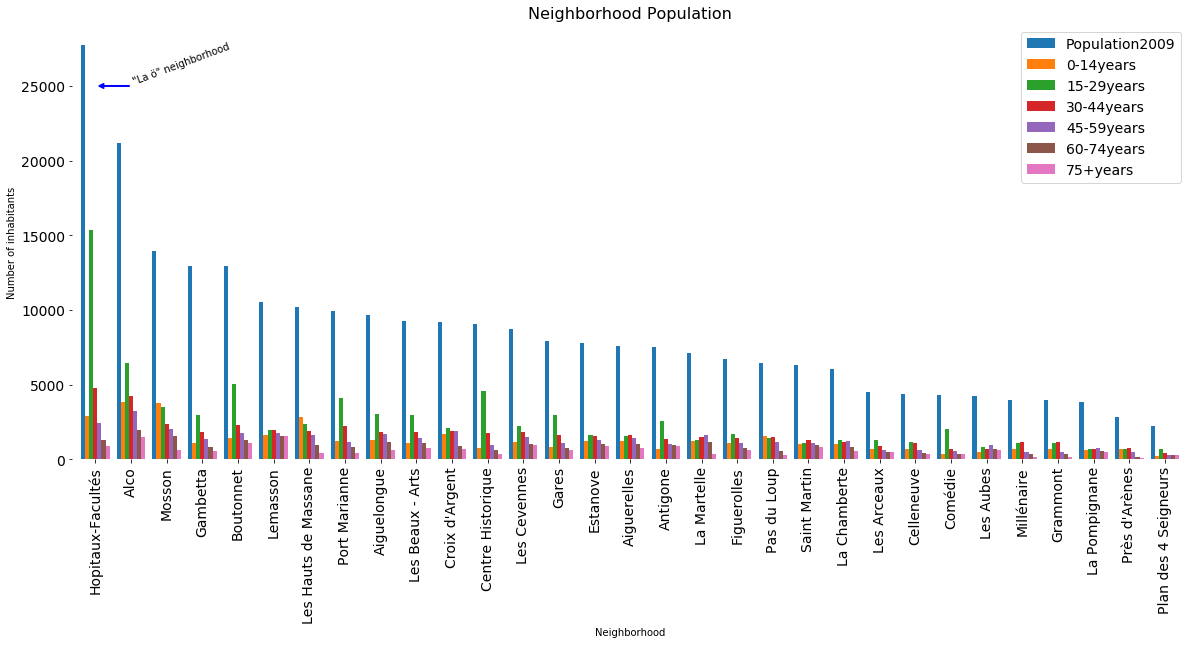

In [78]:
# neighborhood inhabitants age and split
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

montpellier_population=montpellier_sousquartier[['LIBSQUART','Population2009', 'TerritorySurface','NumberInhabitantskilometer2',
       '0-14years','15-29years', '30-44years', '45-59years', '60-74years', '75+years',
       'Percentage0-14years', 'Percentage15-29years', 'Percentage30-44years',
       'Percentage45-59years', 'Percentage60-74years','Percentage75+years',
        'Agriculteurs exploitants',
       'Artisans, Comma., Chefs entr.', 'Cadres, Prof. intel. sup.',
       'Prof. Intermédiaires', 'Employés', 'Ouvriers', 'Retraités', 'Autres',
       ]]

montpellier_population.sort_values(by='Population2009', ascending=False, inplace=True)

montpellier_population.set_index("LIBSQUART", inplace=True)

usefullColumns= ['Population2009','0-14years','15-29years', '30-44years', '45-59years', '60-74years', '75+years']
ax = montpellier_population[usefullColumns].plot(kind='bar',
                               figsize=(20, 8),
                               # color=['#5cb85c', '#5bc0de', '#d9534f' ],
                            grid=False, 
                              width=0.8, fontsize=14)

plt.title('Neighborhood Population', fontsize=16)
plt.legend(fontsize=14)
plt.box(False);
plt.xlabel('Neighborhood')
plt.ylabel('Number of inhabitants')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(0, 25000),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(1, 25000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('"La ö" neighborhood', # text to display
             xy=(1, 25000),                    # start the text at at point (year 2008 , pop 30)
             rotation=20.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


In [18]:
# check out territaory surface ( Port Marianne seems erroneous)
montpellier=montpellier_sousquartier.sort_values(by='TerritorySurface', ascending=False, inplace=False)
montpellier[['LIBSQUART','TerritorySurface']]

,LIBSQUART,TerritorySurface
SQUARTIER_,,
22,Port Marianne,57.0
8,Hopitaux-Facultés,6.0
9,Aiguelongue,4.0
13,Grammont,4.0
17,Millénaire,4.0
21,La Martelle,3.0
30,Croix d'Argent,3.0
7,Plan des 4 Seigneurs,2.0
11,Alco,2.0


### Neighborhood % age breakdown

Text(0.5, 1.0, 'Neighborhood Population age breakdown')

Text(0, 0.5, '% population')

Text(0.5, 0, 'Neighborhood')

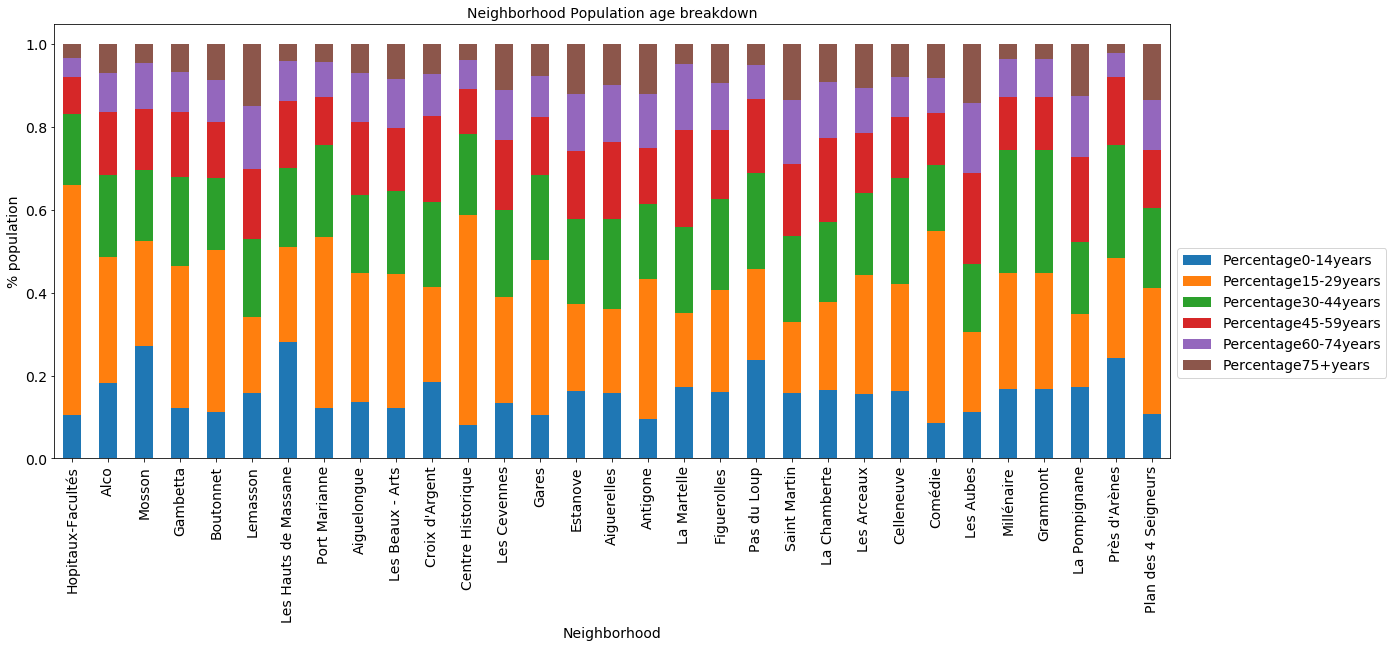

In [102]:
# investigate the %age in each neighborhood
# stacked Histogram
usefullColumns= ['Percentage0-14years', 'Percentage15-29years', 'Percentage30-44years','Percentage45-59years', 'Percentage60-74years','Percentage75+years']

montpellier_population[usefullColumns].plot(kind='bar',
                                            figsize=(20, 8),
                                            stacked=True,
                                            fontsize=14
         )

plt.title('Neighborhood Population age breakdown',fontsize=14)
plt.ylabel('% population',fontsize=14)
plt.xlabel('Neighborhood',fontsize=14) 
plt.legend(fontsize=14,bbox_to_anchor=(1, 0.5))

plt.show()

### Neighborhood inhabitants profession

Text(0.5, 1.0, 'Occupation of active inhabitants')

Text(0, 0.5, 'Population')

Text(0.5, 0, 'Neighborhood')

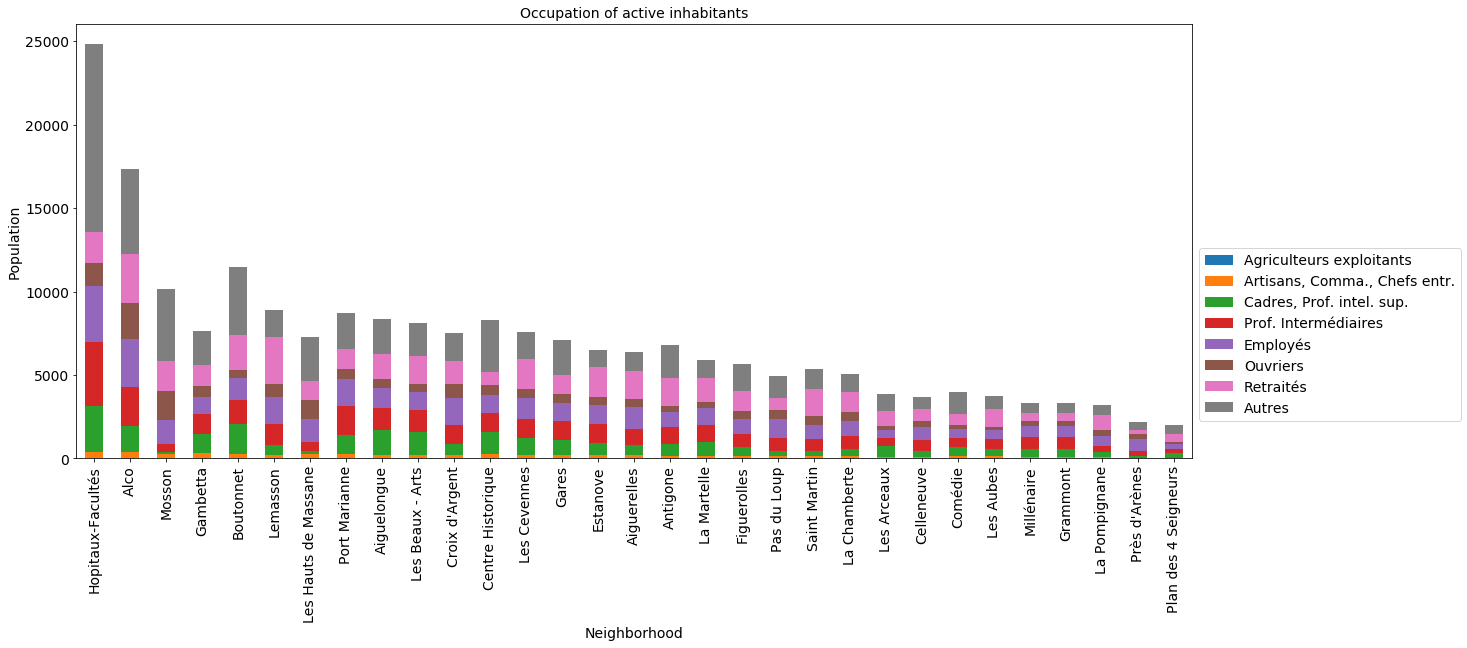

In [103]:
usefullColumns= ['Agriculteurs exploitants','Artisans, Comma., Chefs entr.', 'Cadres, Prof. intel. sup.',
                 'Prof. Intermédiaires', 'Employés', 'Ouvriers', 'Retraités', 'Autres']


montpellier_population[usefullColumns].plot(kind='bar',
                                            figsize=(20, 8),
                                            stacked=True,
                                            fontsize=14
         )

plt.title('Occupation of active inhabitants',fontsize=14)
plt.ylabel('Population',fontsize=14)
plt.xlabel('Neighborhood',fontsize=14) 
plt.legend(fontsize=14,bbox_to_anchor=(1, 0.5))


In [26]:
# where are the university and schools
montpellier=montpellier_sousquartier.sort_values(by='Administration publique, enseignement, santé humaine et action sociale', ascending=False, inplace=False)
montpellier[['LIBSQUART','Administration publique, enseignement, santé humaine et action sociale','Activités scientifiques et techniques ; services administratifs et de soutien']]


,LIBSQUART,"Administration publique, enseignement, santé humaine et action sociale",Activités scientifiques et techniques ; services administratifs et de soutien
SQUARTIER_,,,
13,Grammont,396.0,74.0
17,Millénaire,396.0,74.0
1,Boutonnet,309.0,179.0
8,Hopitaux-Facultés,243.0,229.0
3,Centre Historique,228.0,446.0
18,Les Cevennes,224.0,104.0
20,Antigone,195.0,191.0
12,Mosson,176.0,222.0
24,Gares,167.0,270.0


###  social care

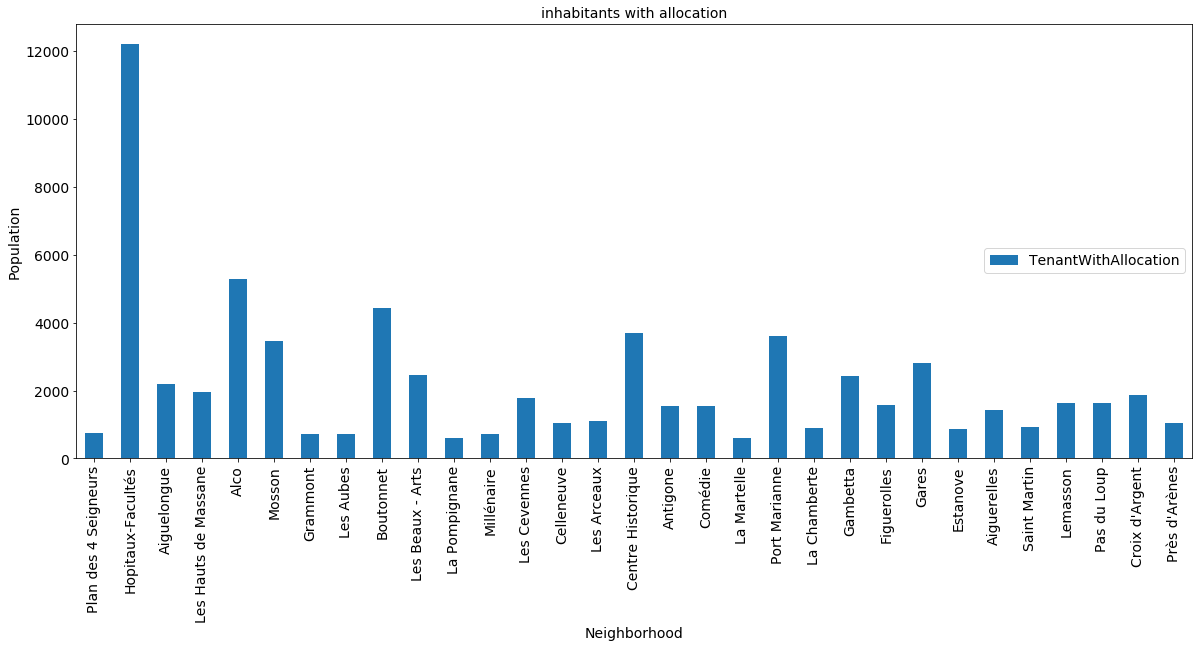

In [36]:
usefullColumns= ['TenantWithAllocation']

montpellier_sousquartier2 =  montpellier_sousquartier.set_index("LIBSQUART")

montpellier_sousquartier2[usefullColumns].plot(kind='bar',
                                            figsize=(20, 8),
                                            fontsize=14
         )

plt.title('inhabitants with allocation',fontsize=14)
plt.ylabel('Population',fontsize=14)
plt.xlabel('Neighborhood',fontsize=14) 
plt.legend(fontsize=14,bbox_to_anchor=(1, 0.5))


# Cluster neighborhoods using activities, services and venues

In [6]:
usefullColumns= ['Industries extractives,  énergie, eau, gestion des déchets et dépollution',
    'Fabrication de denrées alimentaires, de boissons et  de produits à base de tabac',
    'Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines',
    'Fabrication de matériels de transport',
    'Fabrication autres produits industriels',
    'Construction',
    'Commerce ; réparation dautomobiles et de motocycles',
    'Transports et entreposage',
    'Hébergement et restauration',
    'Information et communication',
    'Activités financières et dassurance:',
    'Activités immobilières',
    'Activités scientifiques et techniques ; services administratifs et de soutien',
    'Administration publique, enseignement, santé humaine et action sociale',
    'Autres activités de services',
    'Établissements sans salariés',
    'Établissement de 1 à 49 salariés',
    'Établissements de 50 salariés et +',
    #
    #
    'Hypermarché',
     'Supermarché',
     'Grande surface de bricolage',
     'Supérette',
     'Epicerie',
     'Boulangerie',
     'Boucherie charcuterie',
     'Produits surgelés',
     'Poissonnerie',
     'Librairie papeterie journaux',
     'Magasin de vêtements',
     'Magasin déquipements du foyer',
     'Magasin de chaussures',
     'Magasin délectroménager et de mat. audio-vidéo',
     'Magasin de meubles',
     'Magasin darticles de sports et de loisirs',
     'Magasin de revêtements murs et sols',
     'Droguerie quincaillerie bricolage',
     'Parfumerie',
     'Horlogerie Bijouterie',
     'Fleuriste',
     'Magasin doptique',
     'Station service',
    #
    # services
    #
    'Police',
    'Trésorerie',
    'Gendarmerie',
    'Cour dappel',
    'Tribunal de grande instance',
    'Tribunal dinstance',
    'Conseil de prud’hommes',
    'Tribunal de commerce',
    'Agence de proximité',
    'Relais pôle emploi',
    'Permanence pôle emploi',
    'Agence de services spécialisés',
    'Agence thématique',
    'Banque, Caisse dépargne',
    'Pompes funèbres',
    'Bureau de poste',
    'Relais poste commerçant',
    'Agence postale communale',
    'Réparation auto et de matériel agricole',
    'Contrôle technique automobile',
    'Location auto-utilitaires légers',
    'École de conduite',
    'Maçon',
    'Plâtrier peintre',
    'Menuisier, charpentier, serrurier',
    'Plombier, couvreur, chauffagiste',
    'Électricien',
    'Entreprise générale du bâtiment',
    'Coiffure',
    'Vétérinaire',
    'Agence de travail temporaire',
    'Restaurant',
    'Agence immobilière',
    'Blanchisserie-Teinturerie']

montpellier_activities=montpellier_sousquartier[usefullColumns]
print('There are {} columns.'.format(len(montpellier_activities)))

There are 31 columns.


In [7]:
# we need to normalize or not ? ( I don't know yet)
montpellier_activities_norm=montpellier_activities

inertias: [10328699.93548387  4316229.10344828  1669704.88888889  1089188.72222222
   812318.95714286   633752.95714286]


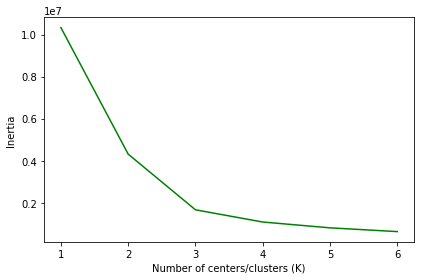

In [41]:
# 
# find the best k (number of clusters) regarding the inertia_ score
#
Ks = 7 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(montpellier_activities_norm)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
print("inertias:" , inertias)
# 
# plot the inertia with the different k to find the better balance
#
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [8]:
# I decide to choose 4 as it is a good balance between clutering reability and inertia score
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 12).fit(montpellier_activities_norm)
kmeans.labels_[0:40] 

array([0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
# Display the information on the centers
print("number of clusters:", len(kmeans.cluster_centers_))
#print("cluster center:" , kmeans.cluster_centers_)
print("number of iterations:", kmeans.n_iter_)
print("inertia (Sum of squared distances of samples to cluster center): ", kmeans.inertia_)
#montpellier_activities_norm.head()

number of clusters: 4
number of iterations: 2
inertia (Sum of squared distances of samples to cluster center):  1089188.7222222222


In [10]:
# add clustering labels
montpellier_sousquartier.insert(0, 'Cluster Labels', kmeans.labels_)
montpellier_sousquartier.astype({'Cluster Labels':'int32'},copy=False)

,Cluster Labels,SQUARTMNO,QUARTIER,AREA,PERIMETER,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0,HOS,1,2301380,"7061,21",Plan des 4 Seigneurs,"7063,80336949","2303072,59613",3.856287,43.642495,Sous-quartier_03_Plan des 4 seigneurs.xlsx,2241.0,2.0,35906.0,0.384190,0.615810,978.0,68.0,0.116942,0.0,238.0,682.0,431.0,314.0,273.0,299.0,0.106465,0.304455,0.192698,0.140375,0.122189,0.133817,8.0,29.0,272.0,268.0,296.0,92.0,528.0,489.0,0.004266,0.014791,0.137014,0.135125,0.149444,0.046762,0.266186,0.246413,2036.0,204.0,0.908736,0.091264,528.0,48.0,483.0,0.498116,0.045972,0.455913,297.0,110.0,73.0,6.0,0.0,735.0,750.0,445.0,679.0,366.0,1.0,2.0,0.0,0.0,3.0,11.0,13.0,0.0,2.0

In [11]:
# display the number of borough per cluster
montpellier_sousquartier['Cluster Labels'].value_counts()

0    18
2     9
3     2
1     2
Name: Cluster Labels, dtype: int64

In [12]:
# display each cluster #0
montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 0, montpellier_sousquartier.columns[[1] + list(range(5, montpellier_sousquartier.shape[1]))]]

,SQUARTMNO,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,HOS,Plan des 4 Seigneurs,"7063,80336949","2303072,59613",3.856287,43.642495,Sous-quartier_03_Plan des 4 seigneurs.xlsx,2241.0,2.0,35906.0,0.384190,0.615810,978.0,68.0,0.116942,0.0,238.0,682.0,431.0,314.0,273.0,299.0,0.106465,0.304455,0.192698,0.140375,0.122189,0.133817,8.0,29.0,272.0,268.0,296.0,92.0,528.0,489.0,0.004266,0.014791,0.137014,0.135125,0.149444,0.046762,0.266186,0.246413,2036.0,204.0,0.908736,0.091264,528.0,48.0,483.0,0.498116,0.045972,0.455913,297.0,110.0,73.0,6.0,0.0,735.0,750.0,445.0,679.0,366.0,1.0,2.0,0.0,0.0,3.0,11.0,13.0,0.0,2.0,7.0,1.0,5.0,15.0,12.0,9.0,64.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,

In [13]:
# display each cluster #1
montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 1, montpellier_sousquartier.columns[[1] + list(range(5, montpellier_sousquartier.shape[1]))]]

,SQUARTMNO,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,MIG,Grammont,"6135,78791559","1898325,0459",3.925423,43.616454,Sous-quartier_19_Millénaire-Grammont.xlsx,3990.0,4.0,30669.0,0.319703,0.680297,995.0,310.0,0.148379,0.0,668.0,1116.0,1188.0,509.0,365.0,142.0,0.167419,0.279747,0.297737,0.127751,0.091666,0.035681,0.0,93.0,457.0,707.0,691.0,293.0,455.0,613.0,0.0,0.028324,0.13797,0.213666,0.208637,0.088687,0.137487,0.185229,3817.0,173.0,0.956642,0.043358,838.0,38.0,1104.0,0.42329,0.019351,0.557359,517.0,347.0,184.0,40.0,15.0,706.0,1850.0,402.0,1329.0,620.0,1334.0,54.0,4.0,12.0,0.0,19.0,151.0,199.0,21.0,37.0,173.0,82.0,74.0,396.0,73.0,1334.0,742.0,553.0,0.0,0.0,1.0,0.

In [14]:
# display each cluster #2
montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 2, montpellier_sousquartier.columns[[1] + list(range(5, montpellier_sousquartier.shape[1]))]]

,SQUARTMNO,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,HOP,Hopitaux-Facultés,"13936,2911114","6211651,21697",3.836393,43.637377,Sous-quartier_01_Hôpitaux-Facultés.xlsx,27726.0,6.0,21710.0,0.188655,0.811345,4258.0,1082.0,0.156943,0.0,2885.0,15390.0,4794.0,2447.0,1299.0,908.0,0.104068,0.555086,0.172929,0.088283,0.046865,0.032768,0.0,384.0,2769.0,3803.0,3372.0,1404.0,1816.0,11274.0,0.000000,0.015485,0.111559,0.153204,0.135857,0.056586,0.073158,0.454151,25290.0,2435.0,0.912160,0.087840,8982.0,773.0,4813.0,0.616540,0.053067,0.330393,2507.0,1196.0,846.0,238.0,55.0,12197.0,14036.0,1686.0,7421.0,5438.0,4.0,4.0,5.0,0.0,20.0,80.0,147.0,28.0,57.0,76.0,53.0,50.0,229.0,243.0,69

In [17]:
# display each cluster #3
montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 3, montpellier_sousquartier.columns[[1] + list(range(5, montpellier_sousquartier.shape[1]))]]

,SQUARTMNO,LIBSQUART,Shape_Leng,Shape_Area,LONGITUDE,LATITUDE,SocioEcoFile,Population2009,TerritorySurface,IncomePerInhanbitant,PercentageLandowners,PercentageTenants,NumberInhabitantskilometer2,NumberSocialMinimumIncome,PercentageUnemployed,PercentageRentControlledHousing,0-14years,15-29years,30-44years,45-59years,60-74years,75+years,Percentage0-14years,Percentage15-29years,Percentage30-44years,Percentage45-59years,Percentage60-74years,Percentage75+years,Agriculteurs exploitants,"Artisans, Comma., Chefs entr.","Cadres, Prof. intel. sup.",Prof. Intermédiaires,Employés,Ouvriers,Retraités,Autres,PercentageAgriculteurs exploitants,"PercentageArtisans, Comma., Chefs entr.","PercentageCadres, Prof. intel. sup.",PercentageProf. Intermédiaires,PercentageEmployés,PercentageOuvriers,PercentageRetraités,PercentageAutres,Français,Étrangers,PercentageFrançais,PercentageÉtrangers,Ménages 1 personne,Autres sans famille,Ménages avec famille(s),PercentageMénages 1 personne,PercentageAutres sans famille,PercentageMénages avec famille(s),Famille0 enfant,Famille1 enfant,Famille2 enfants,Famille3 enfants,Famille4 enfants ou plus,TenantWithAllocation,Flats,Houses,WorkingInMontpellier,WorkingOutsiteMontpellier,"Industries extractives, énergie, eau, gestion des déchets et dépollution","Fabrication de denrées alimentaires, de boissons et de produits à base de tabac","Fabrication équipements électriques, électroniques, informatiques ; fabrication de machines",Fabrication de matériels de transport,Fabrication autres produits industriels,Construction,Commerce ; réparation dautomobiles et de motocycles,Transports et entreposage,Hébergement et restauration,Information et communication,Activités financières et dassurance:,Activités immobilières,Activités scientifiques et techniques ; services administratifs et de soutien,"Administration publique, enseignement, santé humaine et action sociale",Autres activités de services,Établissements sans salariés,Établissement de 1 à 49 salariés,Établissements de 50 salariés et +,Hypermarché,Supermarché,Grande surface de bricolage,Supérette,Epicerie,Boulangerie,Boucherie charcuterie,Produits surgelés,Poissonnerie,Librairie papeterie journaux,Magasin de vêtements,Magasin déquipements du foyer,Magasin de chaussures,Magasin délectroménager et de mat. audio-vidéo,Magasin de meubles,Magasin darticles de sports et de loisirs,Magasin de revêtements murs et sols,Droguerie quincaillerie bricolage,Parfumerie,Horlogerie Bijouterie,Fleuriste,Magasin doptique,Station service,Police,Trésorerie,Gendarmerie,Cour dappel,Tribunal de grande instance,Tribunal dinstance,Conseil de prud’hommes,Tribunal de commerce,Agence de proximité,Relais pôle emploi,Permanence pôle emploi,Agence de services spécialisés,Agence thématique,"Banque, Caisse dépargne",Pompes funèbres,Bureau de poste,Relais poste commerçant,Agence postale communale,Réparation auto et de matériel agricole,Contrôle technique automobile,Location auto-utilitaires légers,École de conduite,Maçon,Plâtrier peintre,"Menuisier, charpentier, serrurier","Plombier, couvreur, chauffagiste",Électricien,Entreprise générale du bâtiment,Coiffure,Vétérinaire,Agence de travail temporaire,Restaurant,Agence immobilière,Blanchisserie-Teinturerie
SQUARTIER_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,MCH,Centre Historique,"3530,78803039","642399,532953",3.877030,43.611059,Sous-quartier_25_Centre Historique.xlsx,9033.0,0.0,26959.0,0.189654,0.810346,13896.0,623.0,0.217601,0.0,736.0,4579.0,1768.0,964.0,636.0,347.0,0.081540,0.506960,0.195770,0.106762,0.070510,0.038458,7.0,233.0,1315.0,1147.0,1125.0,585.0,787.0,3089.0,0.000873,0.028117,0.158658,0.138369,0.135747,0.070594,0.094971,0.372672,7953.0,1078.0,0.880553,0.119447,3388.0,634.0,1586.0,0.603995,0.113160,0.282845,917.0,369.0,253.0,41.0,4.0,3683.0,6831.0,147.0,2736.0,759.0,1.0,22.0,1.0,0.0,50.0,35.0,447.0,17.0,254.0,41.0,57.0,101.0,446.0,228.0,129.0,1255.0,573

In [29]:
print("Cluster 0" , montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 0, montpellier_sousquartier.columns[[5]]]['LIBSQUART'].str.cat(sep=', '))
print("Cluster 1" , montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 1, montpellier_sousquartier.columns[[5]]]['LIBSQUART'].str.cat(sep=', '))
print("Cluster 2" , montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 2, montpellier_sousquartier.columns[[5]]]['LIBSQUART'].str.cat(sep=', '))
print("Cluster 3" , montpellier_sousquartier.loc[montpellier_sousquartier['Cluster Labels'] == 3, montpellier_sousquartier.columns[[5]]]['LIBSQUART'].str.cat(sep=', '))


Cluster 0 Plan des 4 Seigneurs, Aiguelongue, Les Hauts de Massane, Les Aubes, La Pompignane, Les Cevennes, Celleneuve, Les Arceaux, La Martelle, La Chamberte, Figuerolles, Estanove, Aiguerelles, Saint Martin, Lemasson, Pas du Loup, Croix d'Argent, Près d'Arènes
Cluster 1 Grammont, Millénaire
Cluster 2 Hopitaux-Facultés, Alco, Mosson, Boutonnet, Les Beaux - Arts, Antigone, Port Marianne, Gambetta, Gares
Cluster 3 Centre Historique, Comédie


In [51]:
# display the clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(len(montpellier_sousquartier['Cluster Labels'].value_counts()))
ys = [i + x + (i*x)**2 for i in range(len(montpellier_sousquartier['Cluster Labels'].value_counts()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
count=0

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montpellier_sousquartier['LATITUDE'], montpellier_sousquartier['LONGITUDE'], montpellier_sousquartier['LIBSQUART'], montpellier_sousquartier['Cluster Labels']):
    label = folium.Popup(str(poi) + '/ Cluster is ' + str(cluster), parse_html=True)  
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=1.7).add_to(map_clusters)
       
map_clusters

## Maps

In [67]:
# getting longitude and latitude of Montpellier
address = 'Montpellier'
geolocator = Nominatim(user_agent="montpellier_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Montpellier are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Montpellier are 43.6112422, 3.8767337.


### Choropleth map of neighbohoods based on Income Per Inhanbitant

In [93]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-0eba13e3-5fe4-4935-84a1-b954791c0dda',
    'IBM_API_KEY_ID': 'uNvb5RiIuvdx9k-mcugVadO3W6duMXZO3awVj4TvXgwn',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstonedatascience-donotdelete-pr-phsjrfy99t4wme',
    'FILE': 'VilleMTP_MTP_SousQuartiers.geojson'
}

cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

In [97]:
myjsonData = json.loads(load_string(get_file('VilleMTP_MTP_SousQuartiers.geojson')))
# create a Choropleth map
montpellier_map_Choropleth = folium.Map(location=[latitude, longitude], zoom_start=12)
montpellier_map_Choropleth.choropleth(
    geo_data=myjsonData,
    data=montpellier_sousquartier,
    columns=['SQUARTMNO', 'IncomePerInhanbitant'], # second column
    key_on='feature.properties.SQUARTMNO',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Neighbourhood of Montpellier: income per inhabitant'
)

# display map
montpellier_map_Choropleth


In [106]:
# ranking of neighboorhood by income
montpellier_sousquartier[['LIBSQUART','IncomePerInhanbitant','Population2009']].sort_values(by=['IncomePerInhanbitant'],ascending=True).head(10)

,LIBSQUART,IncomePerInhanbitant,Population2009
SQUARTIER_,,,
12,Mosson,16089.0,13920.0
31,Près d'Arènes,19686.0,2864.0
8,Hopitaux-Facultés,21710.0,27726.0
10,Les Hauts de Massane,21723.0,10173.0
11,Alco,22589.0,21167.0
19,Celleneuve,23404.0,4387.0
6,Figuerolles,24289.0,6725.0
24,Gares,24781.0,7946.0
22,Port Marianne,24823.0,9951.0


# Foursquare venues

### Get the venues from the webservice

In [38]:
# foursquare crendentials
CLIENT_ID = 'JMXA0VAYNSTYQ5NHWZGRB1GOUI0QEEWVEOD5YZFDU1ZVJL5O' # your Foursquare ID
CLIENT_SECRET = 'KV2YRAJYADPIFDDBK5AWDE41F1OJAEA5EDMKTQL23GU0AXW2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50# limit of number of venues returned by Foursquare API
radius = 2000 # define radius (in meters)

def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                     'Id',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
# Now write the code to run the above function on each neighborhood and create a new dataframe called montpellier_venues.
subquartiernames = montpellier_sousquartier['SQUARTMNO'].astype(str)+'_'+montpellier_sousquartier['LIBSQUART']
montpellier_venues = getNearbyVenues(names=subquartiernames,
                                   latitudes=montpellier_sousquartier['LATITUDE'],
                                   longitudes=montpellier_sousquartier['LONGITUDE']
                                  )
montpellier_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Id,Venue Latitude,Venue Longitude,Venue Category
0,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Trinque Fougasse,4b92b077f964a520ad1134e3,43.636158,3.867669,Wine Bar
1,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Serre Amazonienne,4d4d5145a7f86ea8b13435de,43.639466,3.873951,Exhibit
2,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Domaine d'Ô,4b700c24f964a520c6042de3,43.633979,3.839228,Park
3,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Palais des Sports René Bougnol,4b729219f964a520de7e2de3,43.638034,3.874432,Stadium
4,HOS_Plan des 4 Seigneurs,43.642495,3.856287,C.C Trifontaine,4d67c789f23f37044242cc33,43.649152,3.842617,Shopping Mall
5,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Le Verre à Vin,4dca7654e4cde9e42f8607f7,43.646419,3.839367,French Restaurant
6,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Parc Zoologique de Montpellier,4b7015f5f964a52068062de3,43.639654,3.873805,Zoo
7,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Boulangerie du Plan,4d621765b6b9a1cd01b68e51,43.640580,3.857756,Bakery
8,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Kyriad Montpellier Nord - Parc Euromédecine,4bcf2a5d0ffdce721744b2c0,43.650543,3.843461,Hotel
9,HOS_Plan des 4 Seigneurs,43.642495,3.856287,Trinque Fougasse,4d8540497e8ef04d886f1dbe,43.640354,3.862381,French Restaurant


In [40]:
print('There are {} venues.'.format(len(montpellier_venues)))
print('There are {} unique venue categories.'.format(len(montpellier_venues['Venue Category'].unique())))
montpellier_venues['Venue Category'].unique()

There are 1126 venues.
There are 110 unique venue categories.


array(['Wine Bar', 'Exhibit', 'Park', 'Stadium', 'Shopping Mall',
       'French Restaurant', 'Zoo', 'Bakery', 'Hotel', 'Supermarket',
       'Sporting Goods Shop', 'Health Food Store', 'Bus Stop', 'Trail',
       'Toy / Game Store', 'Hardware Store', 'Restaurant', 'Tram Station',
       'Café', 'Diner', 'Fast Food Restaurant', 'Pizza Place',
       'Grocery Store', 'Arts & Crafts Store', 'Volleyball Court',
       'Thrift / Vintage Store', 'Pool', 'Japanese Restaurant',
       'Garden Center', 'Home Service', 'Campground', 'Smoke Shop',
       'Soccer Stadium', 'Golf Course', 'Medical Supply Store', 'Gym',
       'Convenience Store', 'Dessert Shop', 'Department Store',
       'Gas Station', 'Theater', 'Discount Store', 'Vacation Rental',
       'Castle', 'Electronics Store', 'Furniture / Home Store',
       'Multiplex', 'Aquarium', 'Concert Hall', 'Bowling Alley',
       'Planetarium', 'Scandinavian Restaurant', 'Pub', 'Cosmetics Shop',
       'Bagel Shop', 'Arcade', 'Clothing Store',

In [41]:
# how many venues per subquartier
montpellier_venues.groupby('Neighborhood').count().sort_values(by=['Neighborhood'])

,Neighborhood Latitude,Neighborhood Longitude,Venue,Id,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
CVA_Alco,18,18,18,18,18,18,18
CVC_La Chamberte,24,24,24,24,24,24,24
CVM_La Martelle,15,15,15,15,15,15,15
CVN_Les Cevennes,28,28,28,28,28,28,28
CXA_Croix d'Argent,26,26,26,26,26,26,26
CXE_Estanove,37,37,37,37,37,37,37
CXM_Lemasson,50,50,50,50,50,50,50
CXP_Pas du Loup,13,13,13,13,13,13,13
HOA_Aiguelongue,15,15,15,15,15,15,15


In [42]:
# do we find "restaurant la ô" as a venue
montpellier_venues[montpellier_venues['Venue']=='Restaurant la ô']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Id,Venue Latitude,Venue Longitude,Venue Category


In [49]:
# filter on a sub-set of neighboorhood
montpellier_venues_selected = montpellier_venues[ (montpellier_venues['Neighborhood']=='MCG_Gambetta') | (montpellier_venues['Neighborhood']=='PAI_Mosson') | (montpellier_venues['Neighborhood']=='CVA_Alco') ]
# 
print('There are {} venues.'.format(len(montpellier_venues_selected)))
print('There are {} unique venue categories.'.format(len(montpellier_venues_selected['Venue Category'].unique())))
montpellier_venues_selected['Venue Category'].unique()

There are 86 venues.
There are 47 unique venue categories.


array(['Park', 'Grocery Store', 'Restaurant', 'Convenience Store',
       'Diner', 'Dessert Shop', 'Department Store', 'Tram Station',
       'Gas Station', 'Theater', 'Bakery', 'Shopping Mall', 'Pizza Place',
       'Soccer Stadium', 'Hotel', 'Supermarket', 'Golf Course',
       'Discount Store', 'Vacation Rental', 'Volleyball Court',
       'Fast Food Restaurant', 'French Restaurant', 'Coffee Shop',
       'Bistro', 'Café', 'Plaza', 'Historic Site', 'Cocktail Bar', 'Bar',
       'Cosmetics Shop', 'Fish & Chips Shop', 'Wine Bar', 'Burger Joint',
       'Pub', 'Public Art', 'Brewery', 'Opera House', 'Pedestrian Plaza',
       'Argentinian Restaurant', 'Other Nightlife', 'Movie Theater',
       'Canal Lock', 'Gastropub', 'Lounge', 'Art Gallery',
       'Seafood Restaurant', 'Art Museum'], dtype=object)

In [64]:
# select only the restaurant
restaurant_categories=[ 'Restaurant', 
       'Diner', 'Dessert Shop', 'Pizza Place',
       'Fast Food Restaurant', 'French Restaurant', 'Coffee Shop',
        'Fish & Chips Shop', 'Burger Joint',
       'Pub', 
       'Argentinian Restaurant', 'Gastropub',
       'Seafood Restaurant']
montpellier_venues_selected_restaurant = montpellier_venues_selected[montpellier_venues_selected['Venue Category'].isin(restaurant_categories)]
montpellier_venues_selected_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Id,Venue Latitude,Venue Longitude,Venue Category
76,CVA_Alco,43.619652,3.839013,Cafet' de Sup de Co,4d64f852cf2bb60c8d52a1bc,43.621413,3.833217,Restaurant
78,CVA_Alco,43.619652,3.839013,Le Sens Six,4f02f6820e01089c58869be6,43.610737,3.849742,Diner
79,CVA_Alco,43.619652,3.839013,Scholler,4c02287dcbd876b0cbf7f043,43.610881,3.848207,Dessert Shop
89,CVA_Alco,43.619652,3.839013,Pierrot & Fils,4dade8316a23e6c9347f1dfd,43.618583,3.863589,Pizza Place
100,PAI_Mosson,43.621561,3.816940,Cafet' de Sup de Co,4d64f852cf2bb60c8d52a1bc,43.621413,3.833217,Restaurant
109,PAI_Mosson,43.621561,3.816940,McDonald's,4e46686952b1bac0d9754cb2,43.613970,3.800143,Fast Food Restaurant
737,MCG_Gambetta,43.604150,3.872250,Chez Ouam,4e0639b214959022c88f0059,43.608506,3.873728,French Restaurant
738,MCG_Gambetta,43.604150,3.872250,bonobo,59fedc1c6f0aa26647297cb3,43.608827,3.874160,Coffee Shop
743,MCG_Gambetta,43.604150,3.872250,Coffee Club,524affb4498ef4827a0ffb73,43.610002,3.876010,Coffee Shop
746,MCG_Gambetta,43.604150,3.872250,Thym et Romarin,4d9a1f2433c760fcc0ba6a6e,43.608376,3.874218,French Restaurant


In [65]:
montpellier_venues_selected_restaurant.shape

(27, 8)

### Plot the venues

In [ ]:
# define the color by marker
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [70]:
# create map and display it
montpellier_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# instantiate a feature group for the montpellier venues in the dataframe
venues = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(montpellier_venues_selected_restaurant['Venue Latitude'], montpellier_venues_selected_restaurant['Venue Longitude']):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

montpellier_map.add_child(venues)
    
montpellier_map

### All venues of montpellier

In [69]:
# create map and display it
montpellier_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# instantiate a feature group for the montpellier venues in the dataframe
venues = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(montpellier_venues['Venue Latitude'], montpellier_venues['Venue Longitude']):
    venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

    
# add pop-up text to each marker on the map
latitudes = list(montpellier_venues['Venue Latitude'])
longitudes = list(montpellier_venues['Venue Longitude'])
labels = list(montpellier_venues['Venue Category'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(montpellier_map)    
    
# add venues to map
#montpellier_map.add_child(venues)

montpellier_map

### get ratings of restaurant Venues

In [95]:
# loop on all the restaurant venues in montpellier to get the tips
for i, j in montpellier_venues_selected_restaurant[(montpellier_venues_selected_restaurant['Neighborhood']=='CVA_Alco') | (montpellier_venues_selected_restaurant['Neighborhood']=='PAI_Mosson')].iterrows(): 
    ## print(i, j) 
    ## print(""+str(j['Id'])) 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(str(j['Id']), CLIENT_ID, CLIENT_SECRET, VERSION)
    #print(url)
    result = requests.get(url).json()
    #print(result['response']['venue'].keys())
    
    # overall rating of the restaurant
    try:
        print('Neighbourhood {}: Rating for "{}" is {}'.format(str(j['Neighborhood']),result['response']['venue']['name'],result['response']['venue']['rating']))
    except:
        print('Neighbourhood {}: Rating for "{}": This venue has not been rated yet.'.format(str(j['Neighborhood']),result['response']['venue']['name']))

Neighbourhood CVA_Alco: Rating for "Cafet' de Sup de Co": This venue has not been rated yet.
Neighbourhood CVA_Alco: Rating for "Le Sens Six" is 5.8
Neighbourhood CVA_Alco: Rating for "Scholler": This venue has not been rated yet.
Neighbourhood CVA_Alco: Rating for "Pierrot & Fils": This venue has not been rated yet.
Neighbourhood PAI_Mosson: Rating for "Cafet' de Sup de Co": This venue has not been rated yet.
Neighbourhood PAI_Mosson: Rating for "McDonald's" is 5.2


In [89]:
venue_id = '4dca7654e4cde9e42f8607f7' # ID of "le verre à vin"
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4dca7654e4cde9e42f8607f7?client_id=JMXA0VAYNSTYQ5NHWZGRB1GOUI0QEEWVEOD5YZFDU1ZVJL5O&client_secret=KV2YRAJYADPIFDDBK5AWDE41F1OJAEA5EDMKTQL23GU0AXW2&v=20180605'

In [90]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4dca7654e4cde9e42f8607f7',
 'name': 'Le Verre à Vin',
 'contact': {},
 'location': {'lat': 43.64641880381981,
  'lng': 3.839367163057608,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.64641880381981,
    'lng': 3.839367163057608}],
  'cc': 'FR',
  'city': 'Montpellier',
  'state': 'Languedoc',
  'country': 'France',
  'formattedAddress': ['Montpellier', 'France']},
 'canonicalUrl': 'https://foursquare.com/v/le-verre-%C3%A0-vin/4dca7654e4cde9e42f8607f7',
 'categories': [{'id': '4bf58dd8d48988d10c941735',
   'name': 'French Restaurant',
   'pluralName': 'French Restaurants',
   'shortName': 'French',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 3},
 'price': {'tier': 3, 'message': 'Expensive', 'currency': '€'},
 'likes': {'count': 7,
  'groups': [{'type': 'others',
    'count': 7,
    'items': [{'id': '24246957',
      'firstName': 'Hervé',
      'last

In [91]:
# overall rating of the restaurant
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.6


In [92]:
# get the number of tips
result['response']['venue']['tips']['count']

3

# ---------------- SANDBOX ----------------------------

### facebook data source

In [136]:
# website : https://developers.facebook.com/
TOKEN='EAAGtVZA0iCIsBAP9YMqbKxHwW3OJ45ZAwSPUzBocqeQGhKQtuoIEVs2lCZAHTv0WmZCmdMdYzMOkZCvZBiuTXqan6Nfj2dfL706FqYVW6ZBZBS36SpfRu1ehT9dxQZBnDjnJAZAoaYS39k1dc7m2ABYKyqcBjRJVCTdtZA3qLlpVsFwZCWnL75AKYgZAEYVc6qmwR5zY3iGuXoY4UmpuwWWjXE5qI99KbcVJFHDCeBeY8RJD6ytYpREO17gjT'
BASEURL='https://graph.facebook.com/v5.0/'

url = '{}me?&access_token={}&fields=id%2Cname&'.format(
            BASEURL,
            TOKEN 
            )        
print(url)
            
# make the GET request
results = requests.get(url).json()
print(results)

#curl -i -X GET "https://graph.facebook.com/v5.0/me?fields=id%2Cname&access_token=EAAGtVZA0iCIsBAP9YMqbKxHwW3OJ45ZAwSPUzBocqeQGhKQtuoIEVs2lCZAHTv0WmZCmdMdYzMOkZCvZBiuTXqan6Nfj2dfL706FqYVW6ZBZBS36SpfRu1ehT9dxQZBnDjnJAZAoaYS39k1dc7m2ABYKyqcBjRJVCTdtZA3qLlpVsFwZCWnL75AKYgZAEYVc6qmwR5zY3iGuXoY4UmpuwWWjXE5qI99KbcVJFHDCeBeY8RJD6ytYpREO17gjT"


https://graph.facebook.com/v5.0/me?&access_token=EAAGtVZA0iCIsBAP9YMqbKxHwW3OJ45ZAwSPUzBocqeQGhKQtuoIEVs2lCZAHTv0WmZCmdMdYzMOkZCvZBiuTXqan6Nfj2dfL706FqYVW6ZBZBS36SpfRu1ehT9dxQZBnDjnJAZAoaYS39k1dc7m2ABYKyqcBjRJVCTdtZA3qLlpVsFwZCWnL75AKYgZAEYVc6qmwR5zY3iGuXoY4UmpuwWWjXE5qI99KbcVJFHDCeBeY8RJD6ytYpREO17gjT&fields=id%2Cname&
{'id': '179142353486837', 'name': 'Christophe Spielmann'}


In [127]:
import facebook
page_token = your_page_token
graph = facebook.GraphAPI(access_token=page_token, version="3.1")

ModuleNotFoundError: No module named 'facebook'

## sandbox call

In [ ]:
# count the incident into a nieghbourhod
df_sanfranN = df_sanfran[['PdDistrict','IncidntNum']].groupby('PdDistrict').count()